 오퍼상이 어떤 새로운 물건을 계약하고자 할 때, 어떤 제품이 시장에서 인기가 있고 가격대가 어느 정도인지를 수집해야 하는데,
그 일을 자동으로 수행하고자 이 크롤러를 제작하게 되었습니다.

In [1]:
!pip install chromedriver_autoinstaller

In [2]:
!pip install selenium

In [1]:
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

from selenium import webdriver   # 웹 브라우저 자동화
from selenium.webdriver.common.keys import Keys
import chromedriver_autoinstaller

import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
from tqdm import tqdm_notebook   # for문 돌릴 때 진행상황을 %게이지로 알려준다.

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# python 버전 확인
!python --version

Python 3.9.12


In [3]:
# 판다스 버전 확인
pd.__version__

'1.4.2'

In [4]:
pwd

'C:\\Users\\andam\\Desktop\\프로젝트\\Naver_Trend_Analysis'

## 네이버트렌드 확인

In [5]:
# 크롬창 띄우기
import chromedriver_autoinstaller
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)

driver.get("https://datalab.naver.com/")
time.sleep(1)

In [6]:
#분야 리스트 클릭
Area_list = driver.find_element_by_css_selector(".select_btn")
Area_list.click()
time.sleep(1)

In [7]:
# #분야 리스트 확인
Categori_li = driver.find_elements_by_css_selector('#content > div.spot.section_keyword > div.section.main_tab_opt > div.select.depth._dropdown > ul')

for i in range(0, len(Categori_li)):
    print(Categori_li[i].text)
    


패션의류
패션잡화
화장품/미용
디지털/가전
가구/인테리어
출산/육아
식품
스포츠/레저
생활/건강
여가/생활편의
면세점
도서


In [8]:
search = input("검색할 카테고리를 입력하세요: ")

검색할 카테고리를 입력하세요: 패션잡화


In [9]:
driver.find_element_by_link_text(search).click( )
time.sleep(1)

In [10]:
#작일 랭킹 1위 가져오기
Rank = driver.find_elements_by_css_selector('#content > div.spot.section_keyword > div.home_section.active > div > div.keyword_carousel > div > div > div:nth-child(12) > div > div > ul > li:nth-child(1) > a > span')

for i in range(0, len(Rank)):   #셀렉터오류로 여러개의 값을 가져올까봐,,, 그냥 for문으로 출력
    print(Rank[i].text)

에코백


## 네이버쇼핑에서  찾기

In [11]:
#키워드 설정
keyword = Rank[0].text
print(keyword)

에코백


In [12]:
#네이버쇼핑으로 이동
driver.get("https://shopping.naver.com/home/p/index.naver")

In [13]:
#커서 클릭
element = driver.find_element_by_css_selector("#_verticalGnbModule > div > div._header_header_REoTl > div > div._gnb_header_shop_Xd6Hq > div > div._gnbSearch_search_area_3LAyd > form > fieldset > div > input")
element.click()
time.sleep(1)

# 검색 창에 검색어 입력 및 클릭
# element = driver.find_element_by_css_selector("#autocompleteWrapper > input.co_srh_input._input.N\=a\:SNB\.search")
# element.clear()  # 검색창에 존재하는 텍스트가 있다면 제거
element.send_keys(keyword)
time.sleep(1)
driver.find_element_by_css_selector("#_verticalGnbModule > div > div._header_header_REoTl > div > div._gnb_header_shop_Xd6Hq > div > div._gnbSearch_search_area_3LAyd > form > fieldset > div > button._searchInput_button_search_1n1aw > svg > path").click( )
time.sleep(1)

In [14]:
# 스크롤을 밑으로 내려주는 함수
def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, 99999999)")
    time.sleep(1)

# n: 스크롤할 횟수 설정
n = 6
i = 0
while i < n: # 이 조건이 만족되는 동안 반복 실행
    scroll_down(driver) # 스크롤 다운
    i = i+1


In [15]:
#상품 크롤링 시작
item_name = '.basicList_title__3P9Q7 .basicList_link__1MaTN'
name = driver.find_elements_by_css_selector(item_name)
item_price = '.price_num__2WUXn'
price = driver.find_elements_by_css_selector(item_price)


In [16]:
name_list = list(name)
price_list = list(price)
name_text = []
price_text = []

In [17]:
#텍스트 형태로 변환하여 리스트에 넣기
for i in range(0, len(name_list)):
    name_text.insert(i, name_list[i].text)


#텍스트 형태로 변환하여 리스트에 넣기
for i in range(0, len(price_list)):
    price_text.insert(i, price_list[i].text)


In [18]:
# 가격 리스트 전처리
del1 = '원'
del2 = '최저'
for i, word in enumerate(price_text):
    if del1 in word: 
        price_text[i] = word.strip(del1)
        price_text[i] = price_text[i].replace(',','')

for i, word in enumerate(price_text):
    if del2 in word: 
        price_text[i] = word.strip(del2)
        price_text[i] = price_text[i].replace(',','')        
print(price_text)
price_int = [int(i) for i in price_text]
print(price_int)
print(len(price_int))

['14900', '39000', '15000', '11000', '11000', '25000', '18900', '35200', '1990', '3200', '56000', '13500', '1280', '38330', '68250', '18800', '13500', '41460', '14600', '17500', '38880', '3200', '41400', '78090', '29070', '79040', '24480', '15900', '13800', '39000', '16900', '62500', '6900', '6150', '12000', '65700', '4900', '4980', '15000', '18900', '7350', '35700', '38880', '19800', '38880', '9100']
[14900, 39000, 15000, 11000, 11000, 25000, 18900, 35200, 1990, 3200, 56000, 13500, 1280, 38330, 68250, 18800, 13500, 41460, 14600, 17500, 38880, 3200, 41400, 78090, 29070, 79040, 24480, 15900, 13800, 39000, 16900, 62500, 6900, 6150, 12000, 65700, 4900, 4980, 15000, 18900, 7350, 35700, 38880, 19800, 38880, 9100]
46


In [19]:
print(name_text)

['남자 에코백 빅사이즈 두꺼운 재질 심플 디자인', '크렌쿨 남여공용 빅에코백 숄더백 데일리 캔버스백 토트백', '미아볼사 YAMMY CAT 자수 대학생/여성/남성 크로스 에코백 숄더 캔버스백', '남녀공용 helper 에코백 BYLE0001', '남녀공용 사랑 에코백 BYLE0002', '캉골 에코 프렌들리백 플러스 0037 에코백 크로스백', '슬링키나인 무지에코백 남자 여자 지퍼 크로스 캔버스 대학생 가방', '캉골 에코 프렌들리백 지피 미디움 0036 가방 에코백', '플리츠 미니 패턴 에코백 도시락 손가방 토트백 주름', '미니 에코백 캔버스백 토트백 손목 피크닉 가방', '[V&A] 디올 뮤지엄에코백 블랙 그레이 / 박물관 쇼퍼백', '빌리버스 남자에코백 남자숄더백 남자캔버스백 BCB208 P081124443', '무지 미니 에코백 비비드컬러', '캉골 제리 쇼퍼백 0039 가방 에코백 크로스백', '아페쎄 다니엘라 에코백 20FW COCSX IAI M61446', 'DALRIM 캔버스 에코백 여성 가방 가벼운 숄더백 여자', '레프트필드 국산 지퍼수납 심플에코백 4컬러', '아페쎄 A.P.C TOTE 데님 에코백 BAG M61445', '페이즐리 이미스 에코백 반다나 튼튼한 숄더백', '제이시크 페이즐리 핸드메이드 데일리 어깨 리본 에코백', '쥬에 레오파드 에코백 4 13예약배송', '귀염뽀짝 유니크 3컬러 미니 에코백 토트백 손가방', '드릴리스 투웨이 써클백 에코백 복조리가방 복조리백', '메종키츠네 22FW 팔레로얄 에코백 AU05100WW0008 P700', '구찌 코튼 에코백 라지 GUCCI ECRU LARGE', '22SS 메종키츠네 로고 에코백 GU05125WW0008 P199', '드릴리스 에코백 내추럴 에코백', '리솜 캔버스 코튼 가죽 콤비 지퍼 스퀘어 쇼퍼 토트 숄더 에코백', '캔버스 라벨 포켓 지퍼 크로스 에코백', '키플링 에코백 5컬러 KKAZZ01 KKBZZ01', '마카롱 에코백', '메종키츠네 20FW EC 남녀

In [20]:
print(len(name_text))
print(len(price_int))

46
46


In [21]:
item_df = pd.DataFrame({'Item':name_text, 'Price':price_int})

In [22]:
item_df

,Item,Price
0,남자 에코백 빅사이즈 두꺼운 재질 심플 디자인,14900
1,크렌쿨 남여공용 빅에코백 숄더백 데일리 캔버스백 토트백,39000
2,미아볼사 YAMMY CAT 자수 대학생/여성/남성 크로스 에코백 숄더 캔버스백,15000
3,남녀공용 helper 에코백 BYLE0001,11000
4,남녀공용 사랑 에코백 BYLE0002,11000
5,캉골 에코 프렌들리백 플러스 0037 에코백 크로스백,25000
6,슬링키나인 무지에코백 남자 여자 지퍼 크로스 캔버스 대학생 가방,18900
7,캉골 에코 프렌들리백 지피 미디움 0036 가방 에코백,35200
8,플리츠 미니 패턴 에코백 도시락 손가방 토트백 주름,1990
9,미니 에코백 캔버스백 토트백 손목 피크닉 가방,3200


In [23]:
# 데이터프레임 저장 확인
type(item_df)

pandas.core.frame.DataFrame

In [24]:
# 파일 저장하기
item_df.to_csv("Naver_Trend_Analysis.csv", encoding='utf-8-sig')

In [25]:
pwd

'C:\\Users\\andam\\Desktop\\프로젝트\\Naver_Trend_Analysis'

## 데이터 시각화

In [26]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  # 시각화 라이브러리
import seaborn as sns            # 시각화 라이브러리
# import plotly      # interactive visualization library

from tqdm import tqdm_notebook   # for문 진행상황을 게이지로 알려줌

# 파이썬 warning 무시
import warnings
warnings.filterwarnings(action='ignore')

In [27]:
item_df.sort_values(by='Price', axis=0, ascending=False, inplace=True)
item_df

,Item,Price
25,22SS 메종키츠네 로고 에코백 GU05125WW0008 P199,79040
23,메종키츠네 22FW 팔레로얄 에코백 AU05100WW0008 P700,78090
14,아페쎄 다니엘라 에코백 20FW COCSX IAI M61446,68250
35,아페쎄 남성 로르 로고 데님 인디고 에코백,65700
31,메종키츠네 20FW EC 남녀공용 폭스 헤드 에코백 EU05110WW0008,62500
10,[V&A] 디올 뮤지엄에코백 블랙 그레이 / 박물관 쇼퍼백,56000
17,아페쎄 A.P.C TOTE 데님 에코백 BAG M61445,41460
22,드릴리스 투웨이 써클백 에코백 복조리가방 복조리백,41400
1,크렌쿨 남여공용 빅에코백 숄더백 데일리 캔버스백 토트백,39000
29,키플링 에코백 5컬러 KKAZZ01 KKBZZ01,39000


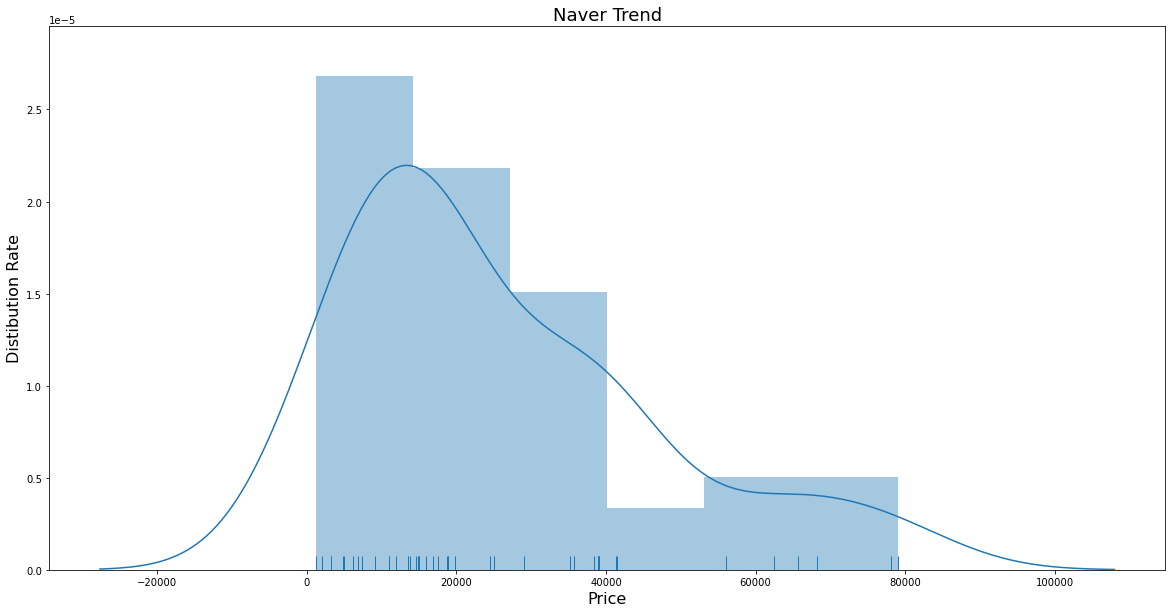

In [28]:
# figure size 지정
plt.figure(figsize = (20, 10))

# displot 함수로 분포 그리기
item_vi = sns.distplot(item_df.Price, rug=True, kde=True)

# 제목, x라벨 ,y라벨 지정
item_vi.set_title('Naver Trend', fontsize=18)
item_vi.set_xlabel('Price', fontdict={'size':16})
item_vi.set_ylabel('Distibution Rate', fontdict={'size':16})

plt.show()